# DATA SCIENCE AND BUSINESS ANALYTICS (GRIP Oct'22)
## Task-1: Prediction using supervised ML

## Name: Jeenia

Problem Statement:
What will be predicted score if a student studies for 9.25hrs/day?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
# Importing Dataset and visualizing Data
df = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
print('Data has been successfully imported')
df

Data has been successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Here, we have data for 25 students-study hours and score achieved.
We will plot the data so that we can roughly find relationship between study hours and scores

In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Fig1- Scatter plot between number of hours studied and the percentage scored

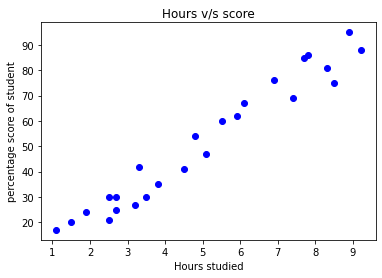

In [4]:
x= df['Hours']
y= df['Scores']
plt.xlabel("Hours studied")
plt.ylabel("percentage score of student")
plt.title("Hours v/s score")
plt.scatter(x,y, color='blue')

### We can Observe that there is a positive linear relationship between study hours and scores

## Fig2- Box Plot for the number of hour studied

Text(0.5, 1.0, ' Boxplot of Number of Hours')

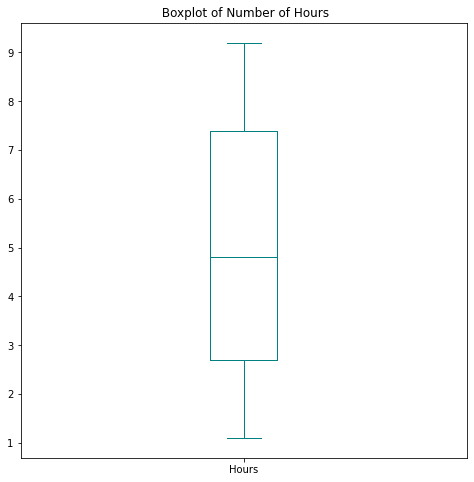

In [5]:
df.Hours.plot.box(color="teal", figsize=(8,8))
plt.title(" Boxplot of Number of Hours")

### The plot shows that median hours of study by a student is almost 5 hours per day. It also shows that there is no outliers and that it is not normally distributed since median is not equal to mean

## Fig3- Boxplot for scores

Text(0.5, 1.0, 'Box plot of Scores of Students')

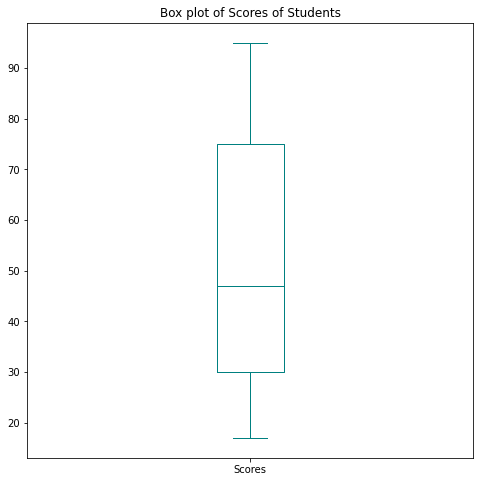

In [6]:
df.Scores.plot.box(color="teal", figsize=(8,8))
plt.title("Box plot of Scores of Students")

### The plot shows that the percentage of score by a student is around 48%. It also shows that there is no outliers and that it is not normally distributed since median is not equal to mean.

## Fig4- Correlation heat map of number of hours studied and the percentage scored

<function matplotlib.pyplot.show(close=None, block=None)>

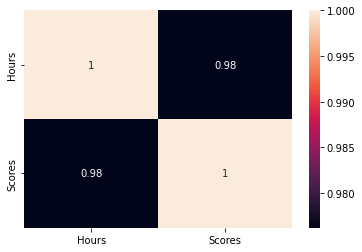

In [7]:
corrmatrix= df.corr()
sn.heatmap(corrmatrix,annot=True)
plt.show

### The correlation coefficient obtained is 0.98 which implies that the hours of study and the percentage scored by a student is highly positively correlated. 

# Data Preparation

The next step is to divide the data into attributes(inputs) and labels(outputs)

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values

Now we have our attributes and and labels,the next step is to split the data into training and tests sets using train_test_split()method

# Splitting data into training and testing sets 

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.20)

In [10]:
print("Dimension of training set of scores=",x_train.ndim)
print("Dimension of training set of hours=", y_train.ndim)

Dimension of training set of scores= 2
Dimension of training set of hours= 1


# Training the algorithm

#from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print('The training is Completed')

# Making prediction on training set and checking RMSE

In [12]:
from sklearn.metrics import r2_score
y_pred =model.predict(x_test)
r2_score(y_test,y_pred)

0.9601769396057881

In [16]:
mean_squared_error(y_test,y_pred,squared=False)

5.523661462438607

### Model has an accuracy score of 0.9601  i.e, it's 96% good fit and it's RMSE is 5.52%

## Fig5- Plotting the regression line and the test data

Text(0.5, 1.0, 'Plotting for the test data and regression line')

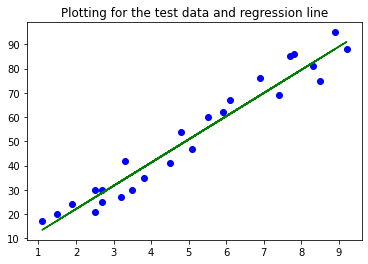

In [14]:
line=model.coef_*x + model.intercept_
plt.scatter(x,y,color="blue")
plt.plot(x,line,color="green")
plt.title("Plotting for the test data and regression line")



# Prediction

In [15]:
# To predict the score of a student if he/she studies 9.25 hours per day
Hours = 9.25
model.predict([[Hours]])

array([91.49342293])

### A student scores 91.49% if she/he studies for 9.25 hours per day